# Assignment Netwerkanalyse

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Joris| secret|
|Hugo|secret |
|Carlijn|secret |
|Huib|secret|

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

Cijfer per student:
 12658650    8.0
12736090    6.0
12827908    6.8
12665142    7.2
dtype: float64


,12658650,12736090,12827908,12665142
12658650,0.25,0.20,0.275,0.275
12736090,0.30,0.25,0.200,0.250
12827908,0.30,0.20,0.250,0.250
12665142,0.30,0.20,0.250,0.250


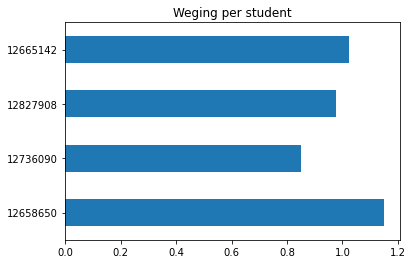

In [1]:
import pandas as pd
%matplotlib inline

def cijfer_per_student(weging,cijfer=7):
    return round(weging*cijfer,1)
#                  JORIS       HUGO        CARLIJN      HUIB
weging = {
        12658650: {12658650:.25,12736090:.2,12827908:.275,12665142:.275},
        12736090: {12658650:.3,12736090:.25,12827908:.2,12665142:.25},
        12827908: {12658650:.3,12736090:.2,12827908:.25,12665142:.25},
        12665142: {12658650:.3,12736090:.2,12827908:.25,12665142:.25}
        }


# verander hier niks aan
df= pd.DataFrame(weging).T
assert all((df.sum(1)==1).values) # per student moeten de gewichten optellen tot 1
df.sum().plot(kind='barh', title='Weging per student');
print("Cijfer per student:\n",cijfer_per_student(df.sum()))
df

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Instructie" data-toc-modified-id="Instructie-1">Instructie</a></span></li><li><span><a href="#Definieer-familie-relaties-en-LHBTQI++" data-toc-modified-id="Definieer-familie-relaties-en-LHBTQI++-2">Definieer familie relaties en LHBTQI++</a></span><ul class="toc-item"><li><span><a href="#1-De-gebruikelijke-familierelaties" data-toc-modified-id="1-De-gebruikelijke-familierelaties-2.1">1 De gebruikelijke familierelaties</a></span><ul class="toc-item"><li><span><a href="#Jullie-opdracht" data-toc-modified-id="Jullie-opdracht-2.1.1">Jullie opdracht</a></span></li><li><span><a href="#Networkx" data-toc-modified-id="Networkx-2.1.2">Networkx</a></span></li></ul></li></ul></li><li><span><a href="#Uitwerking-van-opdracht-1" data-toc-modified-id="Uitwerking-van-opdracht-1-3">Uitwerking van opdracht 1</a></span></li><li><span><a href="#2-Definieer-LHBTQI+" data-toc-modified-id="2-Definieer-LHBTQI+-4">2 Definieer LHBTQI+</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Let-op!" data-toc-modified-id="Let-op!-4.0.1">Let op!</a></span></li></ul></li><li><span><a href="#Jullie-opdracht" data-toc-modified-id="Jullie-opdracht-4.1">Jullie opdracht</a></span></li></ul></li><li><span><a href="#Uitwerking-van-opdracht-2" data-toc-modified-id="Uitwerking-van-opdracht-2-5">Uitwerking van opdracht 2</a></span></li></ul></div>

# Instructie

* 2 opdrachten, elke opdracht kent een Markdown (tekst) deel en een programmeer deel. Voor elk deel kan je 10 punten verdienen. In totaal zijn er dus 40 punten te verdienen.
* Succes! Maak er wat moois van!
* Let op, dit is een vrije opdracht, en er zijn dus meerdere antwoorden goed. Het belangrijkste is dat jullie er over praten, zowel in je groepje als daarbuiten. **Geef in je opdracht aan als je een speciale keuze hebt gemaakt, en geef dan ook de reden. Dat is veel leuker en beter dan dat te verzwijgen/verhullen. En levert je juist punten op.**

# Definieer familie relaties en LHBTQI++

In deze opdracht gaan jullie relaties definieren in termen van meer primitieve relaties. Ook ga je beperkingen op je modellen aanbrengen waarvan je vindt dat die gelden in onze wereld. Zo zorg je ervoor dat elk model van jouw theorie zo goed mogelijk overeenkomt met onze wereld.

## 1 De gebruikelijke familierelaties

* We werken met predicaatlogische modellen, en met een basistaal met 2 eigenschappen: $M$ en $V$, die staan voor de 2 traditionele geslachten, en 1 twee plaatsige relatie $R$, die staat voor *is ouder van*. Hieronder staat dus dat *piet een man is, en joke een vrouw en dat piet de ouder is van joke*:

$$M(piet), V(joke), R(piet,joke).$$
* Wij gaan nu 2 dingen doen:
    1. beperkingen opleggen aan de relaties
    2. nieuwe relaties definieren in termen van de 3 primtieve relaties $M,V,R$
        * in die nieuwe relaties kan je natuurlijk andere eerder gedefinieerde relaties weer gebruiken.
* **Voorbeelden**
* *Beperking:* 
    * Iedereen is man of vrouw (en nooit allebei tegelijk).
    * Iedereen heeft exact 2 ouders, een man en een vrouw.
* *Nieuwe relatie*
    * $Vader(x,y)$ precies dan en slechts dan alleen als x een ouder is van y en x een man is.
        * $\forall xy( Vader(x,y) \leftrightarrow R(x,y) \wedge M(x))$
    * $Opa(x,y)$ hiervoor gebruik je natuurlijk het $\exists z$    connectief.
        * Je kunt dit netjes definieren in termen van ouder en vader. 
    
### Jullie opdracht 

1. Definieer een flink aantal familierelaties.
2. Verzin minstens 1 bestaande familierelatie die je **niet in predicaatlogica** kunt definieren.
    * Leg uit wat er lastig/bijzonder aan is.
3. Geef een aantal beperkingen die (mogelijk) waar zouden kunnen zijn in de echte wereld.
    * Ik schrijf mogelijk omdat het voorbeeld hierboven dat iedereen precies 2 ouders heeft natuurlijk ook omstreden is. Dat geeft niet, je geeft dat dan gewoon aan. 
    * Beschrijf de beperking eerst in heel helder Nederlands, en geef daarnaast de exacte logische zin die erbij past.
    * Op $R$ kan je natuurlijk al heel wat beperkingen opleggen:
        * niemand is ouder van zichzelf
        * ouder is asymmetrisch
        * ....
    
### Networkx

* Maak nu een model van je eigen familie in networkx.
* Stop er minstens 50 mensen in (uit je hele groepje), geef ze allemaal een geslacht en leg de juiste relaties.
* Maak een mooi plaatje.
* Definieer met comprehensies alle relaties die je boven ook gedefinieerd hebt.
    * Maak ook een plaatje, en check dat het klopt.
* Zorg dat het er zo netjes en helder uitziet    dat je echt snel en makkelijk kunt checken dat het klopt.
    * Dit zijn dingen die voor zichzelf spreken: zorg dus ook dat het in jullie opdract zo is.
    
    
        


In [2]:
import networkx as nx
%matplotlib inline

# Uitwerking van opdracht 1


1. **Definieer een aantal familierelaties**


∀xy Vader(x,y) ↔ R(x,y) ∧ M(x)

∀xy Moeder(x,y) ↔ R(x,y) ∧ V(x)


---


∀xy Broer(x,y) ↔ (Vader(x,y) ∧ Moeder(x,y)) ∧ M(x)

∀xy Zus(x,y) ↔ (Vader(x,y) ∧ Moeder(x,y)) ∧ V(x)


---



∀xy Opa(x,y) ↔ ∃z((Vader(x,z) ∧ R(z,y))

∀xy Oma(x,y) ↔ ∃z((Moeder(x,z) ∧ R(z,y))


---

∀xy Oom(x,y) ↔ (R(z,y) ∧ Broer(x,z))

∀xy Tante(x,y) ↔ (R(z,y) ∧ Zus(x,z))

_Alleen bloedverwanten (niet aangetrouwd). Met de huidige primitieven zijn aangetrouwde familieleden niet te definieren._

---

∀xy Neef(x,y) ↔ ((R(z,y) ∧ (Oom(x,z) ∨ Tante(x,z))) ∧ M(x))

∀xy Nicht(x,y) ↔ ((R(z,y) ∧ (Oom(x,z) ∨ Tante(x,z))) ∧ V(x))

<br />

2. **Verzin minstens 1 bestaande familierelatie die je niet in predicaatlogica kunt definieren**

Denk aan geadopteerde kinderen of familieleden die geen biologische relatie hebben met ouders en alleen 'op papier' kinderen van hun ouders zijn.

<br />

3. **Geef een aantal beperkingen die (mogelijk) waar zouden kunnen zijn in de echte wereld.**


* Niemand is een ouder van zichzelf
 * ¬∀x → R(x,x)
* Een ouder is asymmetrisch
 * R(x,y) ↔ ¬R(y,x)

* broer en broer / zus en zus / broer en zus kunnen geen ouder zijn
 * ¬∀xy 

* Iedereen heeft precies 2 ouders en 4 opa/oma's
 * ∀xy → (Vader(x,y) ∧ Moeder(x,y)) ∧ ((Opa(x,y) ∧ Oma(x,y) ∧ (Opa(x,y) ∧ Oma(x,y)))





In [ ]:
# Model van families

G = nx.DiGraph()  

# Add relations between generations 
G.add_edges_from([
(8,1), (8,2),
(9,1), (9,2),
(10,3),
(11, 4), (11, 5),
(12,6), (12,7),
(13,3),
(14, 4), (14, 5),
(15,6), (15,7),
(16, 9), (16,10), (16,11),
(17, 9), (17, 10), (17, 11),
(18, 8), (18,15),
(19, 8), (19,15),
(26, 20), (26, 21),
(27, 20), (27, 21),
(28, 24), (28, 25),
(29, 22), (29, 23),
(30, 22), (30, 23),
(31, 24), (31, 25),
(32, 26), (32, 28),
(33, 26), (33, 28),
(39, 36), (39,37), (39, 38),
(40, 43), (40,44),
(41, 43), (41,44),
(42, 36), (42,37), (42, 38),
(45,34), (45,35),
(46,34), (46,35),
(47,45), (47,41),
(48,46), (48,42),
(49,46), (49,42),
(50,45), (50,41),
(61, 51), (61, 52),
(62, 51), (62, 52),
(63, 53), (63, 54),
(64, 53), (64, 54),
(65, 55), (65, 56), (65, 57),
(66, 55), (66, 56), (66, 57),
(67, 58), (67, 59), (67, 60),
(68, 58), (68, 59), (68, 60),
(69, 52), (69, 63), (69, 65), (69, 68),
(70, 62), (70, 63), (70, 65), (70, 68)])

# Define Men / Women 
M= {1, 2, 3, 4, 6, 8, 13, 14, 15, 17, 18, 21, 22, 24, 25, 26, 30, 
    31, 32, 34, 35, 37, 38, 39, 40, 45, 47, 48, 51, 53, 55, 57, 
    59, 60, 61, 63, 66, 67, 70}
V= {x for x in range(71) if x not in M and x != 0}  

for n in M:
    G.nodes[n]['M']=True
    G.nodes[n]['V']=False
    
for n in V:
    G.nodes[n]['V']=True
    G.nodes[n]['M']=False 

# Add color for Men and Women 
node_color = []
for node in G.nodes(data=True):
    if node[1]['M']:
        node_color.append('Darkturquoise')
    if node[1]['V']:
        node_color.append('coral')
        
# Draw graph of network with four families.
pos = nx.spring_layout(G,k=0.15,iterations=2)
nx.draw(G, pos, with_labels=True, arrows=True, node_color=node_color, node_size = 400, alpha=0.8)

# Relationships based on primitives
def M(x, network=G):
    return network.nodes[x]['M']

def V(x, network=G):
    return network.nodes[x]['V']

def R(x,y,network=G):
    return network.has_edge(x,y)

# ∀xy Vader(x,y) ↔ R(x,y) ∧ M(x)
def Vader(x,y,network=G):
    vaders = {(i,j) for i in network for j in network if (i == x and j == y) and R(i,j) and M(i)}
    if (x,y) in vaders:
        return (x,y)

# ∀xy Moeder(x,y) ↔ R(x,y) ∧ V(x)
def Moeder(x,y,network=G):
    moeders = {(i,j) for i in network for j in network if (i == x and j == y) and R(i,j) and V(i)}
    if (x,y) in moeders:
        return (x,y)

# ∀xy Broer(x,y) ↔ (Vader(x,y) ∧ Moeder(x,y)) ∧ M(x)
def Broer(x,y,network=G):
    broers = {(i,j) for i in network for j in network 
              if (i == x and j == y)
              and {z for z in network if R(z,i) and R(z,j)} and M(i) and i != j}
    if (x,y) in broers:
        return (x,y)

# ∀xy Zus(x,y) ↔ (Vader(x,y) ∧ Moeder(x,y)) ∧ V(x)
def Zus(x,y,network=G):
    zussen = {(i,j) for i in network for j in network 
              if (i == x and j == y)
              and {z for z in network if R(z,i) and R(z,j)} and V(i) and i != j}
    if (x,y) in zussen:
        return (x,y)

# ∀xy Opa(x,y) ↔ ∃z((Vader(x,z) ∧ R(z,y))
def Opa(x,y,network=G):
    opas = {(i,j) for i in network for j in network 
            if (i == x and j == y)
            and {z for z in network if Vader(i,z) and R(z,j)} and i != j}
    if (x,y) in opas:
        return (x,y)

# ∀xy Oma(x,y) ↔ ∃z((Moeder(x,z) ∧ R(z,y))
def Oma(x,y,network=G):
    omas = {(i,j) for i in network for j in network 
            if (i == x and j == y)
            and {z for z in network if Moeder(i,z) and R(z,j)} and i != j}
    if (x,y) in omas:
        return (x,y)

# ∀xy Oom(x,y) ↔ (R(z,y) ∧ Broer(x,z))
# Geeft alleen Ooms terug die bloedverwanten zijn van y, en dus geen aangetrouwde ooms
def Oom(x,y,network=G):
    ooms = {(i,j) for i in network for j in network
            if (i == x and j == y)
            and {z for z in network if R(z,j) and Broer(i,z)}}
    if (x,y) in ooms:
        return (x,y)
    
# ∀xy Tante(x,y) ↔ (R(z,y) ∧ Zus(x,z))
# Geeft alleen Tantes terug die bloedverwanten zijn van y, en dus geen aangetrouwde ooms
def Tante(x,y,network=G):
    tantes = {(i,j) for i in network for j in network
              if (i == x and j == y)
              and {z for z in network if R(z,j) and Zus(i,z)}}
    if (x,y) in tantes:
        return (x,y)

# ∀xy Neef(x,y) ↔ ((R(z,x) ∧ (Oom(z,y) ∨ Tante(z,y))  ∧ M(x))
def Neef(x,y,network=G):
    neven = {(i,j) for i in network for j in network
             if (i == x and j == y) 
             and {z for z in network if (R(z,i) and (Oom(z,j) or Tante(z,j))) and M(i)}}
    if (x,y) in neven:
        return (x,y)

# ∀xy Nicht(x,y) ↔ ((R(z,x) ∧ (Oom(z,y) ∨ Tante(z,y))  ∧ V(x))
def Nicht(x,y,network=G):
    nichten = {(i,j) for i in network for j in network
             if (i == x and j == y) 
             and {z for z in network if (R(z,i) and (Oom(z,j) or Tante(z,j))) and V(i)}}
    if (x,y) in nichten:
        return (x,y)

# Hiermee test je alle functies met een gegeven x en y. 
# Als de functie dezelfde (x,y) tuple returned is het correct (True).
# Indien de functie 'None' returned is het geen bestaande relatie (False).

print(f' Vader: {Vader(8,1) == (8,1), Vader(1,2)}')
print(f' Moeder: {Moeder(9,1) == (9,1), Moeder(1,2)}')
print(f' Broer: {Broer(1,2) == (1,2),Broer(1,8)}')
print(f' Zus: {Zus(5,4) == (5,4), Zus(4,5)}')
print(f' Opa: {Opa(18,1) == (18,1), Opa(1,18)}')
print(f' Oma: {Oma(16,1) == (16,1), Oma(1,16)}')
print(f' Oom: {Oom(15,1) == (15,1), Oom(1,15)}')
print(f' Tante: {Tante(10,1) == (10,1), Tante(1,10)}')
print(f' Neef: {Neef(3,1) == (3,1), Neef(7,1)}')
print(f' Nicht: {Nicht(7,1) == (7,1), Nicht(3,1)}')

# Hiermee krijg je alle relaties binnen het netwerk G per relatie-soort (Runtime ongeveer 2 minuten)
nodes = range(len(G.nodes()))
vaders = {Vader(x,y) for x in nodes for y in nodes} - {None}
moeders = {Moeder(x,y) for x in nodes for y in nodes} - {None}
broers = {Broer(x,y) for x in nodes for y in nodes} - {None}
zussen = {Zus(x,y) for x in nodes for y in nodes} - {None}
opas = {Opa(x,y) for x in nodes for y in nodes} - {None}
omas = {Oma(x,y) for x in nodes for y in nodes} - {None}
ooms = {Oom(x,y) for x in nodes for y in nodes} - {None}
tantes = {Tante(x,y) for x in nodes for y in nodes} - {None}
neven = {Neef(x,y) for x in nodes for y in nodes} - {None}
nichten = {Nicht(x,y) for x in nodes for y in nodes} - {None}

 Vader: (True, None)
 Moeder: (True, None)
 Broer: (True, None)
 Zus: (True, None)
 Opa: (True, None)
 Oma: (True, None)
 Oom: (True, None)
 Tante: (True, None)
 Neef: (True, None)
 Nicht: (True, None)


# 2 Definieer LHBTQI+

* OK, ga er maar aan staan. Linda probeert het op <https://www.linda.nl/nieuws/we-leggen-het-gewoon-uit-waar-staat-lhbtqi-voor/>. 
* Nu is het jullie beurt.
* Dus neem wat primitieven, maar zo min mogelijk,
    * Man, Vrouw, en allicht nog iets, plus logische relaties daartussen
    * een binaire relatie $R$ die "liefdes-relaties" aangeeft...
        * Jij geeft heel exact aan wat $R(x,y)$ voor jullie betekent
    * misschien nog 1 of 2 andere primitieven
        * Geef heel exact aan wat ze betekenen
        
### Let op!

* Vergelijk deze 3 (echt niet equivalente) definities:
    * Je bent een hetero als je van iemand houdt van het andere geslacht
    * ... als je alleen maar van mensen houdt van het andere geslacht
    * ... als je van iemand houdt van het andere geslacht **en** als je alleen maar van mensen houdt van het andere geslacht
    * eeh, *het* andere geslacht..., is er maar 1 dan? 
* Je merkt het, je moet heel precies zijn! 
* Deze opdracht is alleen goed te doen, als jullie elkaar steeds controleren en scherp houden, en opjutten om precies te zijn of worden of blijven.
* Maak ook steeds heldere voorbeelden/modellen, en kijk wat je definities doen op die modellen.
    
## Jullie opdracht

* Maak net als boven een theorie voor je primitieven, en definieer alle letters (plus wat er onder de + valt) in termen van je primitieven
* Als het echt niet lukt of kan, zal je dat echt helder moeten motiveren.
* Maak een networkx model met van elke LHBTQI+ letter minstens 1 knoop die zo is volgens jouw definitie.
* Geef exact aan, of mensen meerdere letters tegelijk kunnen zijn,
    * Is iedereen nou 1 van deze letters, of zijn er ook nog andere categorieen? Welke dan? Kan je die ook definieren?

# Uitwerking van opdracht 2


**Primitieven**

Genders: 
$M$ en $V$ en $I$ 

Binaire 'liefdes-relatie' $R$(x,y)

Definitie: *een relatie tussen **twee** mensen seksueel aangetrokken zijn tot elkaar.*

**LHBTQI+(AP) staat voor 'Lesbisch', 'Homoseksueel', 'Biseksueel','Transgender', 'Genderqueer' en 'Intersexe'. Het plusje betekent: iets wat voor de samenleving niet standaard is. Onze invulling hiervoor is Aseksueel en Panseksueel.**

$L$ = $R$(V,V)

$H$ = $R$(M,M)

$B$ = $R$(M,M) || $R$(V,V) || $R$(V,M) 

$T$ = $M$ → $V$ || $V$ → $M$

$Q$ = *

$I$ = ¬$M$ & ¬$V$

$A$ = $R$(¬*)

$P$ = $R$(*)

\* = alle gender-identiteiten


**Meerdere letters tegelijk**
Mensen kunnen zeker meerdere letters tegelijk zijn. Je kan transgender man zijn en homoseksueel (je valt op mannen). Je kan ook genderqueer en aseksueel zijn (queer en je voelt je nergens toe seksueel aangetrokken). 

Gender-identiteit en seksuele orientatie staan los van elkaar. Daarnaast heb je andere categorieen zoals sekse (geboortegeslacht); op dat spectrum bevindt zich ook intersekse. Je kan dus bijvoorbeeld Intersekse geboren zijn en terwijl jouw gender identiteit Man is. 

Laatste categorie is gender-expressie wat is wat je laat zien aan anderen.

Dit is de astronaut: aan de buitenkant van het astronauten-pak zie je niet wat iemand's genderidentiteit, seksuele orientatie, gender-expressie en sekse zijn. Deze wordt vaak in voorlichtingen gebruikt om de verschillende elementen van gender te beschrijven. 

![Astronaut](https://www.gsanetwerk.nl/wp-content/uploads/2018/08/Astronaut-flyer4.jpg)

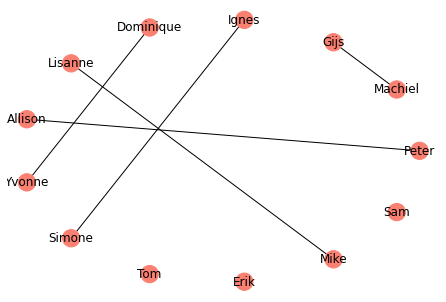

In [5]:
Q = nx.Graph()

M,V,I = {'Peter', 'Machiel','Gijs'}, {'Simone','Ignes','Allison','Lisanne','Yvonne','Dominique'}, {'Mike','Tom','Erik'} # de mannen, vrouwen en intersekse personen in dit netwerk

# De attributen M,V,I goed zetten
Q.add_nodes_from(M)
Q.add_nodes_from(V)
Q.add_nodes_from(I)

for n in M:
    Q.nodes[n]['M']=True
    Q.nodes[n]['V']=False
for n in V:
    Q.nodes[n]['M']=False
    Q.nodes[n]['V']=True
    
# Een intersekse persoon valt niet onder man en ook niet onder vrouw
for n in I:
    Q.nodes[n]['M']=False
    Q.nodes[n]['V']=False


# Trans (M2F)
Q.add_node('Sam')

# Gender-identiteit bij geboorte is Man
Q.nodes['Sam']["M"]=True
Q.nodes['Sam']["V"]=False

# Gender-identiteit verandert naar Vrouw
Q.nodes['Sam']["V"]=True
Q.nodes['Sam']["M"]=False


color_list = ['salmon' for x in range(len(Q.nodes))]
    
    
# Edges zijn relaties tussen personen 
# Nodes hebben een gender (boolean) 
Q.add_edge('Simone', 'Ignes', label="L") # L
Q.add_edge('Machiel', 'Gijs', label="H") # H
Q.add_edge('Peter', 'Allison', label="B") # B1
Q.add_edge('Yvonne', 'Dominique', label="B") # B2
# T = Sam (M2F)
# Q = Tom
# I = Erik
# A = Lot
Q.add_edge('Lisanne', 'Mike', label="P") # P

nx.draw_circular(Q, with_labels=True, node_color=color_list)